# Zadanie 1

In [1]:
import pandas as pd  # Importuj bibliotekę pandas do manipulacji i analizy danych.
import matplotlib.pyplot as plt  # Importuj bibliotekę matplotlib.pyplot do tworzenia wykresów i wizualizacji danych.

In [2]:
# Wczytaj plik CSV 'data/product.csv' i przypisz go do zmiennej df.
df = pd.read_csv('data/product.csv')

# Usuń kolumnę 'id' z ramki danych df.
df.drop('id', axis=1, inplace=True)  


In [4]:
# Wyświetl zmienną df oraz jej kształt (ilość wierszy i kolumn).
df, df.shape  

(        x         y
 0     8.8 -3.339879
 1     9.5 -3.535988
 2    10.1 -3.681798
 3     9.9 -3.536677
 4     9.9 -3.536677
 ..    ...       ...
 495  12.5 -3.807757
 496   8.6 -3.296743
 497  12.5 -3.800713
 498  10.0 -3.775396
 499   8.6 -3.296743
 
 [500 rows x 2 columns],
 (500, 2))

In [5]:
def plotScatter(df):
    # Tworzenie wykresu punktowego (scatter plot)
    plt.scatter(df['x'], df['y'])

    # Dodanie etykiet i tytułu
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Wykres punktowy')

    # Wyświetlenie wykresu
    plt.show()


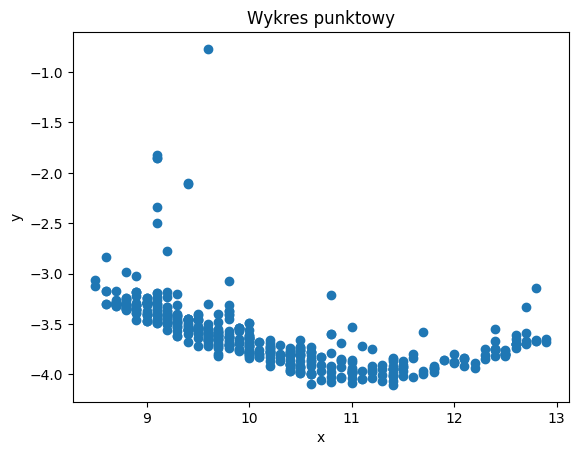

In [6]:
#Wyświetl scatter
plotScatter(df)

In [7]:
# Obliczanie IQR dla każdej kolumny
Q1 = df.quantile(0.25)  # Pierwszy kwartyl
Q3 = df.quantile(0.75)  # Trzeci kwartyl
IQR = Q3 - Q1  # Rozstęp międzykwartylowy (IQR)

# Definiowanie mnożnika do określenia progu dla wartości odstających
threshold_multiplier = 1.5

# Określanie dolnego i górnego progu dla wykrywania wartości odstających
lower_bound = Q1 - threshold_multiplier * IQR
upper_bound = Q3 + threshold_multiplier * IQR

# Usuwanie wierszy zawierających wartości odstające na podstawie określonych progów
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

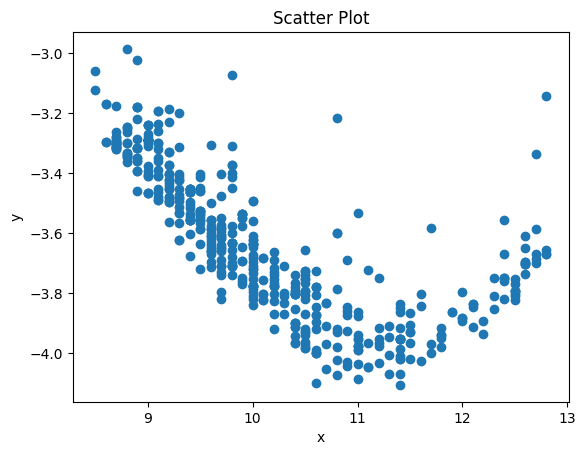

In [61]:
#Wyświetl po eliminacji outlierów
plotScatter(df_no_outliers)

# Podział

In [8]:
from sklearn.model_selection import train_test_split  # Importuj funkcję train_test_split z modułu sklearn.model_selection

X = df_no_outliers['x']  # Przypisz kolumnę 'x' z ramki danych df_no_outliers do zmiennej X
y = df_no_outliers['y']  # Przypisz kolumnę 'y' z ramki danych df_no_outliers do zmiennej y

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)  # Wykonaj podział danych X i y na zbiory treningowy i testowy, gdzie test_size=0.3 oznacza, że 30% danych zostanie przypisane do zbioru testowego, a random_state=42 zapewnia powtarzalność podziału.


In [9]:
import numpy as np  # Importuj bibliotekę numpy

from sklearn.linear_model import LinearRegression  # Importuj model regresji liniowej z modułu sklearn.linear_model
from sklearn.metrics import mean_squared_error, r2_score  # Importuj funkcje do obliczenia metryk oceny modelu: mean_squared_error i r2_score

# Konwersja obiektów typu Series na tablice numpy i zmiana kształtu
X_train_reshaped = X_train.values.reshape(-1, 1)  # Przekształć zmienną X_train na tablicę numpy o odpowiednim kształcie (-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)  # Przekształć zmienną X_test na tablicę numpy o odpowiednim kształcie (-1, 1)

# Utworzenie modelu regresji liniowej
model = LinearRegression()  # Utwórz obiekt modelu regresji liniowej

# Dopasowanie modelu do danych treningowych
model.fit(X_train_reshaped, y_train)  # Dopasuj model do danych treningowych

# Wykonanie predykcji na danych testowych
y_pred = model.predict(X_test_reshaped)  # Wykonaj predykcję na danych testowych

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)  # Obliczenie błędu średniokwadratowego (MSE)
r2 = r2_score(y_test, y_pred)  # Obliczenie współczynnika determinacji (R2)

# Wyświetlenie metryk oceny modelu
print("Błąd średniokwadratowy (MSE):", mse)
print("Współczynnik determinacji (R2):", r2)


Błąd średniokwadratowy (MSE): 0.029397471476370878
Współczynnik determinacji (R2): 0.4432830309726822


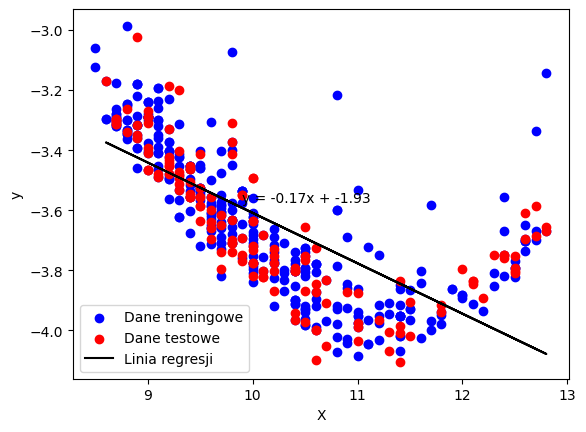

In [10]:
# Wykres danych treningowych
plt.scatter(X_train, y_train, c='blue', label='Dane treningowe')

# Wykres danych testowych
plt.scatter(X_test, y_test, c='red', label='Dane testowe')

# Wykres linii regresji
plt.plot(X_test, y_pred, color='black', label='Linia regresji')

# Dodanie etykiet i legendy
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Dodanie równania linii regresji jako tekstu
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
plt.text(X_train.iloc[0], y_train.iloc[0], equation, ha='left', va='top')

# Wyświetlenie wykresu
plt.show()

# Zadanie 2

In [11]:
import numpy as np  # Importuj bibliotekę numpy
from sklearn.linear_model import LinearRegression  # Importuj model regresji liniowej z modułu sklearn.linear_model
from sklearn.preprocessing import PolynomialFeatures  # Importuj klasę PolynomialFeatures z modułu sklearn.preprocessing
from sklearn.metrics import mean_squared_error, r2_score  # Importuj funkcje do obliczenia metryk oceny modelu: mean_squared_error i r2_score

# Konwersja obiektów typu Series na tablice numpy i zmiana kształtu
X_train_reshaped = X_train.values.reshape(-1, 1)  # Przekształć zmienną X_train na tablicę numpy o odpowiednim kształcie (-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)  # Przekształć zmienną X_test na tablicę numpy o odpowiednim kształcie (-1, 1)

# Tworzenie cech wielomianowych stopnia 2
poly_features2 = PolynomialFeatures(degree=2)  # Utwórz obiekt PolynomialFeatures dla stopnia 2
X_train_poly2 = poly_features2.fit_transform(X_train_reshaped)  # Przekształć X_train na cechy wielomianowe stopnia 2
X_test_poly2 = poly_features2.transform(X_test_reshaped)  # Przekształć X_test na cechy wielomianowe stopnia 2

# Tworzenie cech wielomianowych stopnia 3
poly_features3 = PolynomialFeatures(degree=3)  # Utwórz obiekt PolynomialFeatures dla stopnia 3
X_train_poly3 = poly_features3.fit_transform(X_train_reshaped)  # Przekształć X_train na cechy wielomianowe stopnia 3
X_test_poly3 = poly_features3.transform(X_test_reshaped)  # Przekształć X_test na cechy wielomianowe stopnia 3

# Utworzenie modelu regresji liniowej
model2 = LinearRegression()  # Utwórz obiekt modelu regresji liniowej
model3 = LinearRegression()  # Utwórz obiekt modelu regresji liniowej

# Dopasowanie modelu2 do danych treningowych z cechami wielomianowymi stopnia 2
model2.fit(X_train_poly2, y_train)

# Dopasowanie modelu3 do danych treningowych z cechami wielomianowymi stopnia 3
model3.fit(X_train_poly3, y_train)

# Wykonanie predykcji na danych testowych z cechami wielomianowymi stopnia 2
y_pred2 = model2.predict(X_test_poly2)

# Wykonanie predykcji na danych testowych z cechami wielomianowymi stopnia 3
y_pred3 = model3.predict(X_test_poly3)

# Ocena modelu2
mse2 = mean_squared_error(y_test, y_pred2)  # Obliczenie błędu średniokwadratowego (MSE) dla modelu2
r22 = r2_score(y_test, y_pred2)  # Obliczenie współczynnika determinacji (R2) dla modelu2

# Ocena modelu2
mse2 = mean_squared_error(y_test, y_pred2)  # Obliczenie błędu średniokwadratowego (MSE) dla modelu2
r22 = r2_score(y_test, y_pred2)  # Obliczenie współczynnika determinacji (R2) dla modelu2

# Ocena modelu3
mse3 = mean_squared_error(y_test, y_pred3)  # Obliczenie błędu średniokwadratowego (MSE) dla modelu3
r23 = r2_score(y_test, y_pred3)  # Obliczenie współczynnika determinacji (R2) dla modelu3

# Wyświetlenie metryk oceny modelu2
print("Błąd średniokwadratowy (MSE) dla modelu2:", mse2)
print("Współczynnik determinacji (R2) dla modelu2:", r22)

# Wyświetlenie metryk oceny modelu3
print("Błąd średniokwadratowy (MSE) dla modelu3:", mse3)
print("Współczynnik determinacji (R2) dla modelu3:", r23)


Błąd średniokwadratowy (MSE) dla modelu2: 0.010256240709144273
Współczynnik determinacji (R2) dla modelu2: 0.8057716206715657
Błąd średniokwadratowy (MSE) dla modelu3: 0.009370385140056094
Współczynnik determinacji (R2) dla modelu3: 0.8225475814141467


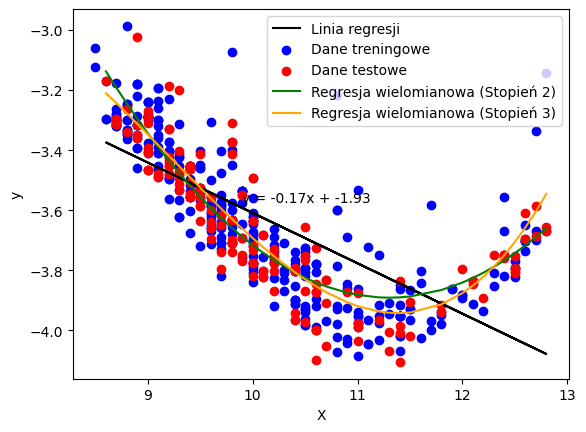

In [12]:
# Wykres linii regresji
plt.plot(X_test, y_pred, color='black', label='Linia regresji')

# Posortowanie wartości X_test
sorted_indexes = np.argsort(X_test.values)
X_test_sorted = X_test.values[sorted_indexes]

# Wykonanie predykcji na posortowanych danych testowych z cechami wielomianowymi
y_pred2_sorted = model2.predict(X_test_poly2[sorted_indexes])
y_pred3_sorted = model3.predict(X_test_poly3[sorted_indexes])

# Wykres danych treningowych
plt.scatter(X_train, y_train, c='blue', label='Dane treningowe')

# Wykres danych testowych
plt.scatter(X_test, y_test, c='red', label='Dane testowe')

# Wykres linii regresji wielomianowej stopnia 2
plt.plot(X_test_sorted, y_pred2_sorted, color='green', label='Regresja wielomianowa (Stopień 2)')

# Wykres linii regresji wielomianowej stopnia 3
plt.plot(X_test_sorted, y_pred3_sorted, color='orange', label='Regresja wielomianowa (Stopień 3)')

# Dodanie etykiet i legendy
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Dodanie równania linii regresji jako tekstu
equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
plt.text(X_train.iloc[0], y_train.iloc[0], equation, ha='left', va='top')

# Wyświetlenie wykresu
plt.show()


# Zadanie 3

### Jaka jest zasadnicza różnica pomiędzy regresją liniową / wielomianową, a logistyczną?

- Zasadnicza różnica między regresją liniową / wielomianową a regresją logistyczną polega na tym, 

    do jakiego rodzaju problemów są stosowane oraz jak interpretują wyniki.
    


- Regresja liniowa / wielomianowa jest używana, gdy chcemy przewidywać wartości liczbowe na podstawie innych zmiennych. 

    Na przykład, jeśli mamy dane dotyczące wieku i zarobków osób, regresja liniowa / wielomianowa pozwoliłaby nam przewidywać zarobki na podstawie wieku.


- Z kolei regresja logistyczna jest stosowana, gdy mamy do czynienia z problemem klasyfikacji binarnej, 

    czyli kiedy chcemy przewidzieć, czy coś należy do jednej z dwóch kategorii. Na przykład, 

    jeśli mamy dane medyczne pacjentów i chcemy przewidzieć, czy dany pacjent ma daną chorobę na podstawie 

    jego objawów i wyników testów, wtedy zastosujemy regresję logistyczną.


- Ostateczna różnica polega na interpretacji wyników. W regresji liniowej / wielomianowej, 

    wynik jest wartością liczbową, którą możemy interpretować jako przewidywaną wartość. 

    Natomiast w regresji logistycznej, wynik jest prawdopodobieństwem przynależności do jednej z dwóch kategorii. 

- Możemy ustalić próg, powyżej którego przewidujemy przynależność do jednej kategorii, 

    a poniżej którego przewidujemy przynależność do drugiej kategorii.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Wczytanie danych z pliku CSV
data = pd.read_csv('data/product2.csv')

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(data[['x', 'y']], data['good'], test_size=0.2, random_state=42)

# Inicjalizacja i trenowanie modelu regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# Przewidywanie klas na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczenie dokładności klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji:", accuracy)


Dokładność klasyfikacji: 0.61


### Czy model zadziała gorzej jeśli pod uwagę weźmiemy tylko kolumnę x i klasę good? Być może kolumna y jest zbędna?

In [18]:
# Wczytanie danych z pliku CSV
data = pd.read_csv('data/product2.csv')

# Podział danych na zbiór treningowy i testowy, uwzględniając tylko kolumnę 'x' i klasę 'good'
X_train, X_test, y_train, y_test = train_test_split(data[['x']], data['good'], test_size=0.2, random_state=42)

# Inicjalizacja i trenowanie modelu regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# Przewidywanie klas na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczenie dokładności klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji:", accuracy)


Dokładność klasyfikacji: 0.61


### Wnioski

W przypadku uwzględnienia tylko kolumny "x" i kolumny z klasą "good" (bez uwzględnienia kolumny "y"), 

dokładność klasyfikacji wynosi 0.61. 

Oznacza to, że model regresji logistycznej, trenowany na podstawie tylko tych dwóch cech, 

jest w stanie poprawnie przewidzieć klasę "good" dla około 61% próbek.

W drugim przypadku, gdzie uwzględniono zarówno kolumnę "x", kolumnę "y" oraz klasę "good", 

dokładność klasyfikacji również wynosi 0.61. To sugeruje, że dodanie kolumny "y" nie wpłynęło znacząco na wyniki klasyfikacji. 

Model regresji logistycznej, trenowany na podstawie tych trzech cech, osiąga podobną dokładność jak w przypadku tylko dwóch cech.